## 回歸問題
### House Prices: Advanced Regression Techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [131]:
import numpy as np
import pandas as pd

# y 是我們的目標

train_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/train.csv"
test_url = "https://storage.googleapis.com/kaggle_datasets/House-Prices-Advanced-Regression-Techniques/test.csv"
train_data = pd.read_csv(train_url) # 訓練資料
test_data = pd.read_csv(test_url) # 實際問題

In [132]:
# print(train_data.head())
print(train_data.shape)
print("-" * 50 + "\n")
train_data.head()

(1460, 81)
--------------------------------------------------



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [133]:
# print(test_data.head())
print(test_data.shape)
print("-" * 50 + "\n")
test_data.head()

(1459, 80)
--------------------------------------------------



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [134]:
# 找出 theta (feature)
# 先找出 x
train_data.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [135]:
a = train_data.corr().loc[:,"SalePrice"]
b = train_data.corr()["SalePrice"]
print(a.head(3), type(a))
print(b.head(3), type(b))

Id            -0.021917
MSSubClass    -0.084284
LotFrontage    0.351799
Name: SalePrice, dtype: float64 <class 'pandas.core.series.Series'>
Id            -0.021917
MSSubClass    -0.084284
LotFrontage    0.351799
Name: SalePrice, dtype: float64 <class 'pandas.core.series.Series'>


In [136]:
train_data.corr()["SalePrice"].abs().sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

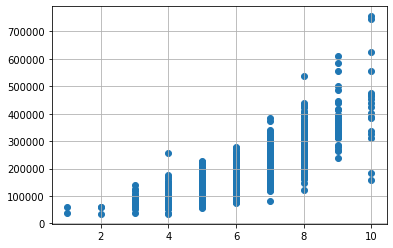

In [137]:
import matplotlib.pyplot as plt

plt.scatter(train_data["OverallQual"], train_data["SalePrice"]) # 整體評價 vs. SalePrice
plt.grid(True)
plt.show()

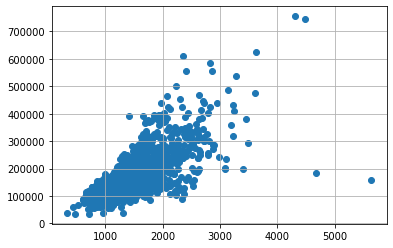

In [138]:
plt.scatter(train_data["GrLivArea"], train_data["SalePrice"]) # 除去地下室的坪數 vs. SalePrice
plt.grid(True)
plt.show()

In [139]:
y_train = train_data["SalePrice"] # Series
print(y_train.head(5), type(y_train))
print(y_train.shape)
print("-" * 50 + "\n")

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64 <class 'pandas.core.series.Series'>
(1460,)
--------------------------------------------------



In [140]:
# Series -> ndarray
y_train = train_data["SalePrice"].values.reshape(-1, 1)
print(y_train, type(y_train))
print(y_train.shape) # vector
print("-" * 50 + "\n")

[[208500]
 [181500]
 [223500]
 ...
 [266500]
 [142125]
 [147500]] <class 'numpy.ndarray'>
(1460, 1)
--------------------------------------------------



In [141]:
# series to vector
x_train = train_data["GrLivArea"].values.reshape(-1, 1)
print(x_train, type(x_train))
print(x_train.shape)
print("-" * 50 + "\n")

[[1710]
 [1262]
 [1786]
 ...
 [2340]
 [1078]
 [1256]] <class 'numpy.ndarray'>
(1460, 1)
--------------------------------------------------



In [142]:
# 令 x0 = 1

ones = np.ones(x_train.shape[0], dtype=int).reshape(-1, 1)
print(ones.shape)
print("-" * 50 + "\n")

(1460, 1)
--------------------------------------------------



In [143]:
x_train = np.concatenate([ones, x_train], axis=1)
print(x_train, type(x_train))
print(x_train.shape)
print("-" * 50 + "\n")

[[   1 1710]
 [   1 1262]
 [   1 1786]
 ...
 [   1 2340]
 [   1 1078]
 [   1 1256]] <class 'numpy.ndarray'>
(1460, 2)
--------------------------------------------------



#### 如何用正規方程找到 $\theta$

![](https://i.imgur.com/vhIRSPy.png)

In [144]:
# 正規方程 Normal Equation
def get_thetas_ne(x, y):
    left_eq = x.T.dot(x)
    right_eq = x.T.dot(y)
    left_eq_inv = np.linalg.inv(left_eq)
    thetas = left_eq_inv.dot(right_eq)
    return thetas

In [145]:
thetas_ne = get_thetas_ne(x_train, y_train)
print(thetas_ne, type(thetas_ne))
print(thetas_ne.shape)
print("-" * 50 + "\n")

[[18569.02585649]
 [  107.13035897]] <class 'numpy.ndarray'>
(2, 1)
--------------------------------------------------



In [146]:
# calculate the result
x_test = test_data["GrLivArea"].values.reshape(-1, 1)
ones = np.ones(x_test.shape[0], dtype=int).reshape(-1, 1)
print(x_test.shape)
print(ones.shape)
x_test = np.concatenate([ones, x_test], axis=1)
x_test

(1459, 1)
(1459, 1)


array([[   1,  896],
       [   1, 1329],
       [   1, 1629],
       ...,
       [   1, 1224],
       [   1,  970],
       [   1, 2000]], dtype=int64)

In [147]:
y_test = x_test.dot(thetas_ne)
print(y_test, type(y_test))
print(y_test.shape)
print("-" * 50 + "\n")

[[114557.82748987]
 [160945.27292207]
 [193084.38061182]
 ...
 [149696.58523066]
 [122485.47405334]
 [232829.74378814]] <class 'numpy.ndarray'>
(1459, 1)
--------------------------------------------------



In [148]:
# 使用 正規方程求得的 theats, 推導出 test_data
test_data["SalePrice"] = y_test
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,114557.827490
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,160945.272922
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,193084.380612
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,190406.121638
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,155695.885333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,135555.377847
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,135555.377847
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,149696.585231
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,122485.474053


### https://scikit-learn.org/stable/
### 如何用  `sklearn` 找到 $\theta$

1. `from sklearn.SUBMODULE import FUNCTION`
2. `model = FUNCTION()`
3. `model.fit(X, y)`
4. `model.intercept_` 找到常數（殘差）項
5. `model.coef_` 找到特徵的係數項

In [149]:
from sklearn import linear_model

In [150]:
reg = linear_model.LinearRegression() # initialize
# retrieve x_train
x_train = train_data["GrLivArea"].values.reshape(-1, 1) # vector
y_train = train_data["SalePrice"].values.reshape(-1, 1) # vector
reg.fit(x_train, y_train)
print("intercept_:", reg.intercept_)
print("coef_:", reg.coef_)
print(thetas_ne, type(thetas_ne))
print("-" * 50 + "\n")

intercept_: [18569.02585649]
coef_: [[107.13035897]]
[[18569.02585649]
 [  107.13035897]] <class 'numpy.ndarray'>
--------------------------------------------------



In [151]:
# involve 另外一個 x, GarageArea
# x: 1460, 3, y: 1460, 1
# theats: 3, 1
# 使用 LinearRegression()
reg = linear_model.LinearRegression() # initialize
x_train2 = train_data.loc[:, ["GrLivArea", "GarageArea"]].values

reg.fit(x_train2, y_train)
intercept_ = reg.intercept_
coef = reg.coef_

print(x_train2, type(x_train2))
print("intercept_:", intercept_)
print("coef:", coef)
print("-" * 50 + "\n")

[[1710  548]
 [1262  460]
 [1786  608]
 ...
 [2340  252]
 [1078  240]
 [1256  276]] <class 'numpy.ndarray'>
intercept_: [-6915.38067356]
coef: [[ 80.67131781 138.65724537]]
--------------------------------------------------



In [153]:
# 使用正規方程
x_train2_ne = np.concatenate([np.ones(x_train2.shape[0], dtype=int).reshape(-1, 1), x_train2], axis=1)
thetas2 = get_thetas_ne(x_train2_ne, y_train)
thetas2

array([[-6915.38067356],
       [   80.67131781],
       [  138.65724537]])

In [154]:
# 整理一下 scikit learn 出來的結果
intercept_ = intercept_[0]
coef.ravel()
print(intercept_, coef, sep="\n")

-6915.380673560634
[[ 80.67131781 138.65724537]]


In [127]:
# calculate the result
test_data = pd.read_csv(test_url) # 實際問題
x_test_2 = test_data.loc[:, ["GrLivArea", "GarageArea"]].values
print(x_test_2)
x_test_2.shape

      GrLivArea  GarageArea
0           896       730.0
1          1329       312.0
2          1629       482.0
3          1604       470.0
4          1280       506.0
...         ...         ...
1454       1092         0.0
1455       1092       286.0
1456       1224       576.0
1457        970         0.0
1458       2000       650.0

[1459 rows x 2 columns]


(1459, 2)

In [128]:
ones = np.ones(x_test_2.shape[0], dtype=int).reshape(-1, 1)
x_test_2 = np.concatenate([ones, x_test_2], axis=1)
print(x_test_2)
x_test_2.shape

[[1.000e+00 8.960e+02 7.300e+02]
 [1.000e+00 1.329e+03 3.120e+02]
 [1.000e+00 1.629e+03 4.820e+02]
 ...
 [1.000e+00 1.224e+03 5.760e+02]
 [1.000e+00 9.700e+02 0.000e+00]
 [1.000e+00 2.000e+03 6.500e+02]]


(1459, 3)

In [129]:
y_test_2 = x_test_2.dot(thetas2)
test_data["SalePrice"] = y_test_2
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,166585.909199
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,143557.861245
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,191330.988300
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,187650.318410
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,166504.472274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,81177.698371
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,120833.670546
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,171692.885653
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,71335.797598


### 如何用梯度遞減找到 $theta$
![alt text](https://i.imgur.com/lkIxQIZ.png)

![alt text](https://i.imgur.com/82taEkC.png)

![alt text](https://i.imgur.com/1bsrkGb.png)

[梯度與梯度下降法](https://www.youtube.com/watch?v=-hwwddjuHAE)

[Keras 深度學習 #2 什麼是梯度下降? | HiSKIO 程式語言線上教學](https://www.youtube.com/watch?v=TFckEoFW5bE)

In [24]:
# 成本函數
def compute_cost(X, y, thetas = np.array([0, 0]).reshape(2, 1)):
    m = y.shape[0]
    y_hat = X.dot(thetas)
    J = 1/(2*m)*np.sum(np.square(y_hat - y)) # MSE
    return J

In [25]:
def gradient_descent(X, y, alpha=0.01, num_iters = 1500):
    thetas = np.array([0, 0]).reshape(2, 1)
    m = y.shape[0]
    J_history = np.zeros(num_iters)
    
    for num_iter in range(num_iters):
        y_hat = X.dot(thetas)
        loss = y_hat - y
        gradient = X.T.dot(loss) / m
        thetas = thetas - alpha * gradient
        J_history[num_iter] = compute_cost(X, y, thetas=thetas)
    return thetas, J_history

In [26]:
x_train_gd = train_data["GrLivArea"].values.reshape(-1, 1)
ones = np.ones(x_train_gd.shape[0], dtype=int).reshape(-1, 1)
x_train_gd = np.concatenate([ones, x_train_gd], axis=1)
x_train_gd
y_train
thetas_gd, J_history = gradient_descent(x_train_gd, y_train)
thetas_gd

C:\Users\Lubright\Anaconda3\envs\web_scraping\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
C:\Users\Lubright\Anaconda3\envs\web_scraping\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in subtract
  # Remove the CWD from sys.path while we load stuff.


array([[nan],
       [nan]])

In [27]:
J_history[:10] # alpha 太大

array([1.18661824e+19, 7.85257699e+27, 5.19652938e+36, 3.43886060e+45,
       2.27570390e+54, 1.50597214e+63, 9.96593665e+71, 6.59506843e+80,
       4.36435923e+89, 2.88816283e+98])

In [28]:
thetas_gd, J_history = gradient_descent(x_train_gd, y_train, alpha=1e-8)
thetas_gd

array([[9.94290253e-02],
       [1.18069042e+02]])

In [29]:
J_history[-5:]

array([1.58841394e+09, 1.58841394e+09, 1.58841394e+09, 1.58841394e+09,
       1.58841394e+09])

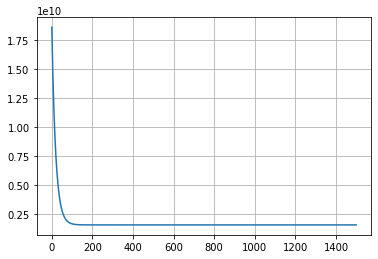

In [30]:
import matplotlib.pyplot as plt

plt.plot(J_history)
plt.grid(True)
plt.show()

In [31]:
# 比對一下
reg = linear_model.LinearRegression() # initialize
# 復原 x_train
x_train = train_data["GrLivArea"].values.reshape(-1, 1) # vector
y_train = train_data["SalePrice"].values.reshape(-1, 1) # vector
reg.fit(x_train, y_train)
print("intercept_:", reg.intercept_)
print("coef_:", reg.coef_)
print(thetas_ne, type(thetas_ne))
print("-" * 50 + "\n")

intercept_: [18569.02585649]
coef_: [[107.13035897]]
[[18569.02585649]
 [  107.13035897]] <class 'numpy.ndarray'>
--------------------------------------------------



In [32]:
train_data["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [33]:
train_data["GrLivArea"].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

### 標準化

- Standard scaler: 以標準差為 1，平均數為 0 的尺度

$$X_{scaled} = \frac{X-\mu_X}{\sigma_X}$$

In [34]:
## 從公式算出 x_train_scaled
x_train_gd = train_data["GrLivArea"].values.reshape(-1, 1) # vector
mu_x = x_train_gd.mean()
sigma_x = x_train_gd.std()
x_train_scaled = (x_train_gd - mu_x) / sigma_x
x_train_scaled, mu_x, sigma_x

(array([[ 0.37033344],
        [-0.48251191],
        [ 0.51501256],
        ...,
        [ 1.56964722],
        [-0.83278768],
        [-0.49393395]]),
 1515.463698630137,
 525.3003935623227)

In [35]:
## 由 sklearn 得出

from sklearn.preprocessing import StandardScaler

### 標準化 x_train_gd
x_train_gd = train_data["GrLivArea"].values.reshape(-1, 1) # vector
scaler = StandardScaler()
scaler.fit(x_train_gd)
x_train_scaled = scaler.transform(x_train_gd)

### 標準化 y_train
scaler.fit(y_train)
y_train_scaled = scaler.transform(y_train)
x_train_scaled, y_train_scaled

(array([[ 0.37033344],
        [-0.48251191],
        [ 0.51501256],
        ...,
        [ 1.56964722],
        [-0.83278768],
        [-0.49393395]]),
 array([[ 0.34727322],
        [ 0.00728832],
        [ 0.53615372],
        ...,
        [ 1.07761115],
        [-0.48852299],
        [-0.42084081]]))

In [36]:
ones = np.ones(x_train_scaled.shape[0], dtype=int).reshape(-1 ,1)
x_train_scaled = np.concatenate([ones, x_train_scaled], axis=1)
x_train_scaled

array([[ 1.        ,  0.37033344],
       [ 1.        , -0.48251191],
       [ 1.        ,  0.51501256],
       ...,
       [ 1.        ,  1.56964722],
       [ 1.        , -0.83278768],
       [ 1.        , -0.49393395]])

In [37]:
y_train_scaled

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [38]:
thetas_gd_scaled, J_history_scaled = gradient_descent(x_train_scaled, y_train_scaled) # 標準化之後，alpha不用特別調很小
thetas_gd_scaled, J_history_scaled

(array([[2.36768177e-16],
        [7.08624277e-01]]),
 array([0.49500362, 0.49010667, 0.48530717, ..., 0.24892567, 0.24892567,
        0.24892567]))

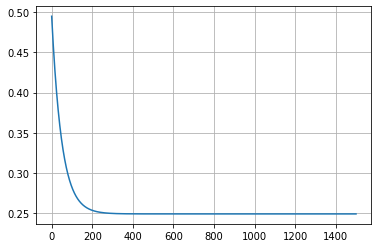

In [39]:
plt.plot(J_history_scaled)
plt.grid(True)
plt.show()

In [74]:
x = np.array([[1, 2], [3, 4]])
a = x.flatten()
x

array([[1, 2],
       [3, 4]])

In [89]:
x = np.array([[1, 2], [3, 4]])
a = x.ravel()
a


array([1, 2, 3, 4])